<a href="https://colab.research.google.com/github/KaioLopesS/Heart-Attack-Analysis/blob/main/Heart_Attack_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
dados_heart = pd.read_csv('/content/heart.csv')
dados_o2saturation = pd.read_csv('/content/o2Saturation.csv')


In [ ]:
dados_o2saturation.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [ ]:
dados_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dados_heart['output'].unique()

array([1, 0])

In [ ]:
dados_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
dados_heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
dados_heart['oldpeak']

0      2.3
1      3.5
2      1.4
3      0.8
4      0.6
      ... 
298    0.2
299    1.2
300    3.4
301    1.2
302    0.0
Name: oldpeak, Length: 303, dtype: float64

In [ ]:
import plotly.express as px

In [ ]:
px.box(dados_heart, x ='age', color = 'output')

In [ ]:
px.histogram(dados_heart, x = 'sex', text_auto= True, color = 'output', barmode = 'group')

In [ ]:
y = dados_heart['output']
x = dados_heart.drop('output', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30,random_state = 2050)

# Modelo base (Dummmy)

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy = DummyClassifier()

In [ ]:
dummy.fit(x_train, y_train)

DummyClassifier()

In [ ]:
print('A acurácia do modelo base (Dummy) foi de {}%'. format((dummy.score(x_test, y_test)*100).round(2)))

A acurácia do modelo base (Dummy) foi de 57.14%


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore = DecisionTreeClassifier(random_state =2050, max_depth = 3)


In [ ]:
arvore.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2050)

In [ ]:
arvore.predict(x_test)

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0])

In [ ]:
print('A acurácia utilizando a árvore de decisão foi de {}%'. format((arvore.score(x_test, y_test)*100).round(2)))

A acurácia utilizando a árvore de decisão foi de 79.12%


[Text(0.5, 0.875, 'x[2] <= 0.5\ngini = 0.498\nsamples = 212\nvalue = [99, 113]\nclass = não'),
 Text(0.25, 0.625, 'x[11] <= 0.5\ngini = 0.352\nsamples = 101\nvalue = [78, 23]\nclass = sim'),
 Text(0.125, 0.375, 'x[12] <= 2.5\ngini = 0.5\nsamples = 39\nvalue = [20, 19]\nclass = sim'),
 Text(0.0625, 0.125, 'gini = 0.363\nsamples = 21\nvalue = [5, 16]\nclass = não'),
 Text(0.1875, 0.125, 'gini = 0.278\nsamples = 18\nvalue = [15, 3]\nclass = sim'),
 Text(0.375, 0.375, 'x[3] <= 109.0\ngini = 0.121\nsamples = 62\nvalue = [58, 4]\nclass = sim'),
 Text(0.3125, 0.125, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = sim'),
 Text(0.4375, 0.125, 'gini = 0.067\nsamples = 58\nvalue = [56, 2]\nclass = sim'),
 Text(0.75, 0.625, 'x[0] <= 56.5\ngini = 0.307\nsamples = 111\nvalue = [21, 90]\nclass = não'),
 Text(0.625, 0.375, 'x[7] <= 152.5\ngini = 0.14\nsamples = 66\nvalue = [5, 61]\nclass = não'),
 Text(0.5625, 0.125, 'gini = 0.408\nsamples = 14\nvalue = [4, 10]\nclass = não'),
 Text(0.6875, 0.125, '

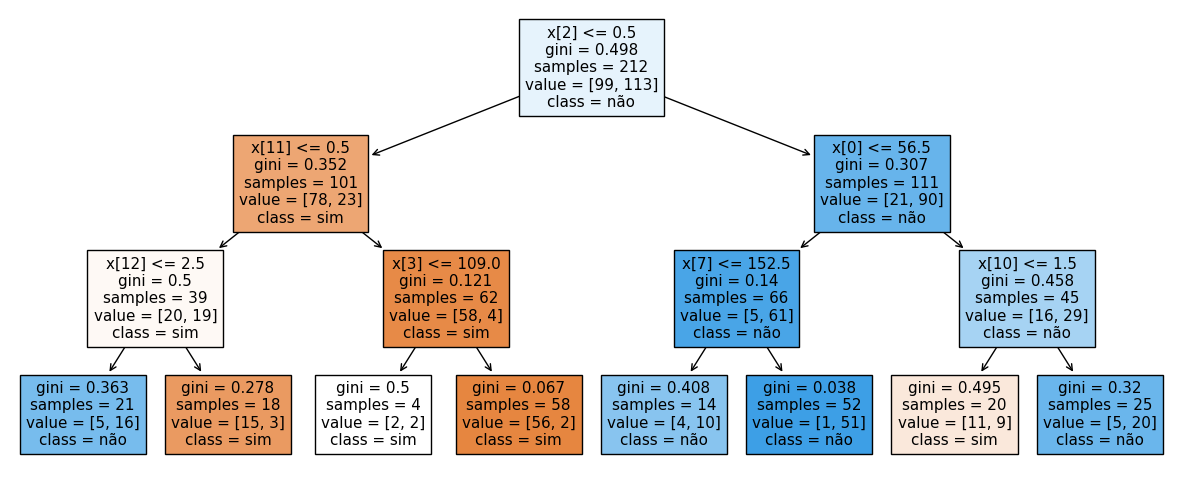

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,6))
plot_tree(arvore, class_names = ['sim', 'não'], filled = True)

# Por KNN

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
normalizacao = MinMaxScaler()
x_train_normalizado = normalizacao.fit_transform(x_train)

In [ ]:
pd.DataFrame(x_train_normalizado.round(2))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.64,1.0,0.33,0.29,0.32,0.0,0.5,0.56,0.0,0.06,0.5,1.00,1.00
1,0.89,1.0,1.00,0.62,0.37,1.0,0.0,0.46,0.0,0.02,0.5,0.25,0.67
2,0.84,1.0,0.00,0.62,0.55,0.0,0.0,0.28,1.0,0.24,0.5,0.75,0.67
3,0.49,1.0,0.00,0.43,0.59,0.0,0.5,0.39,1.0,0.68,0.5,0.75,1.00
4,0.73,0.0,0.00,0.43,0.49,0.0,0.0,0.68,0.0,0.58,0.0,0.50,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,0.38,0.0,0.67,0.45,0.18,0.0,0.0,0.68,1.0,0.23,0.0,0.00,0.67
208,0.69,0.0,0.67,0.25,0.18,1.0,0.5,0.19,0.0,0.00,1.0,0.00,0.67
209,0.82,1.0,0.00,0.25,0.60,0.0,0.0,0.61,0.0,0.06,0.5,0.00,0.67
210,0.84,0.0,0.67,0.55,0.52,0.0,0.5,0.77,0.0,0.00,1.0,0.25,0.67


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train_normalizado, y_train)

KNeighborsClassifier()

In [ ]:
x_teste_normalizado = normalizacao.transform(x_test)

In [ ]:
print('A acurácia utilizando o knn foi de {}%'. format((knn.score(x_test, y_test)*100).round(2)))

A acurácia utilizando o knn foi de 57.14%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



In [ ]:
#Comparando os modelos

print('A acurácia utilizando a árvore de decisão foi de {}%'. format((arvore.score(x_test, y_test)*100).round(2)))
print('A acurácia utilizando o knn foi de {}%'. format((knn.score(x_test, y_test)*100).round(2)))
print('A acurácia do modelo base (Dummy) foi de {}%'. format((dummy.score(x_test, y_test)*100).round(2)))



A acurácia utilizando a árvore de decisão foi de 79.12%
A acurácia utilizando o knn foi de 57.14%
A acurácia do modelo base (Dummy) foi de 57.14%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



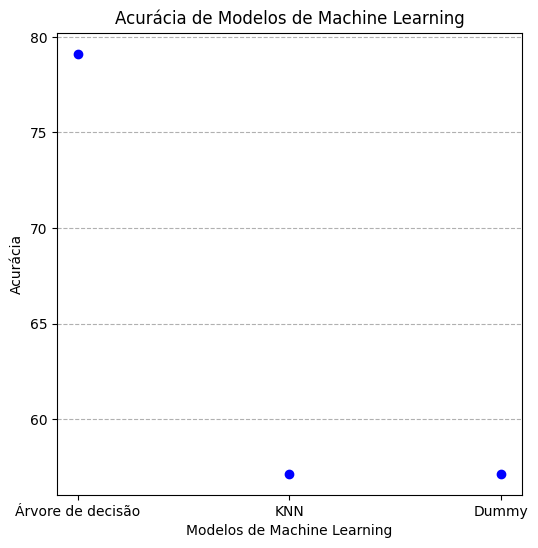

In [ ]:
import matplotlib.pyplot as plt


modelos = ['Árvore de decisão', 'KNN', 'Dummy']
acuracia_1 = (arvore.score(x_test, y_test)*100).round(2)
acuracia_2 = (knn.score(x_test, y_test)*100).round(2)
acuracia_3 = (dummy.score(x_test, y_test)*100).round(2)

acuracias = [acuracia_1,acuracia_2,acuracia_3]


plt.figure(figsize = (6,6))
plt.scatter(modelos, acuracias, color='blue')
plt.xlabel('Modelos de Machine Learning')
plt.ylabel('Acurácia')
plt.title('Acurácia de Modelos de Machine Learning')

plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()


In [ ]:
acuracias = [[acuracia_1,acuracia_2,acuracia_3]]

df = pd.DataFrame(acuracias, columns = ['Árvore de decisão', 'KNN', 'Dummy'])

In [ ]:
df

,Árvore de decisão,KNN,Dummy
0,79.12,57.14,57.14


<Axes: >

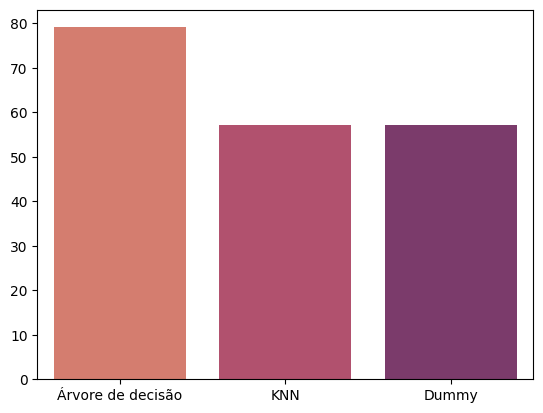

In [ ]:
sns.barplot(df, palette = "flare")


In [ ]:
entrada = x_test[0:1]
entrada

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2


In [ ]:
resultado = print(arvore.predict(entrada))

[1]
